In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import warnings
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from pylab import rcParams
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [86]:
data=pd.read_csv('strongdrink.txt', sep=',',na_values='', encoding="utf-8-sig")
data=data.dropna()
data.isnull().sum()

data['const'] = 1
xvars = data[['alco', 'malic', 'tot_phen', 'color_int']].values
yvals = data['cultivar'].values

# Part 1. a)

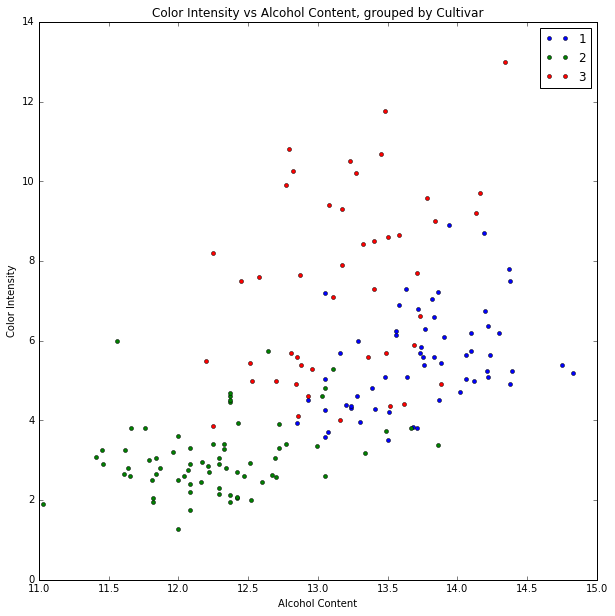

In [144]:
groups=data.groupby('cultivar')
fig,ax=plt.subplots(figsize=(10,10))
for name, group in groups:
    ax.plot(group['alco'], group['color_int'], marker='o', linestyle='', ms=4, label=name)
ax.legend()
plt.xlabel("Alcohol Content")
plt.ylabel("Color Intensity")
plt.title( "Color Intensity vs Alcohol Content, grouped by Cultivar")
plt.show()

# Part 1b)

In [129]:
k = 4
kfold = KFold(n_splits=k, shuffle=True, random_state=22)
kfold.split(xvars)
mseveckf = np.zeros(k)
k_ind = int(0)
for train_index, test_index in kfold.split(xvars):
    print('Fold', k_ind)
    X_train, X_test = xvars[train_index], xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    MultLogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg', penalty = 'l2', C = .3)
    MultLogReg.fit(X_train, y_train)
    y_pred = MultLogReg.predict(X_test)
    mseveckf[k_ind] = ((y_test - y_pred) ** 2).mean()
    print(mseveckf[k_ind])
    print('')
    k_ind += 1

msekf = mseveckf.mean()
msekfstd = MSE_vec_kf.std()
print('The K-fold MSE is', msekf)
print('The K-fold SD is', msekfstd)

Fold 0
0.0454545454545

Fold 1
0.0454545454545

Fold 2
0.0681818181818

Fold 3
0.113636363636

The K-fold MSE is 0.0681818181818
The K-fold SD is 0.0885707799325


After playing with the tuning parameters, it appeared that the value of C=0.3 appears to minimize the overall MSE to a value of 0.06818. Increasing the C value further has no effect on the MSE Value and the function is unable to accept penalty specifications other than 12. Hence the lowest possible k-fold MSE value is 0.06818, obtained at C=0.3 and Penalty=12. 

# Part 1c)

In [140]:
treefit= RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_leaf=10, bootstrap=True, oob_score=True, random_state=22)
treefit.fit(xvars, yvals)
msekf = 1 - treefit.oob_score_
print ("The K-fold MSE is", msekf)

The k-fold test estimate MSE is 0.0681818181818


After playing around with the values, I obtained the same MSE value from part 1b) of this question. I obtained this low MSE  value with the following parameters: n_estimators=100, max_depth=6, min_samples_leaf=10. 

# Part 1d)

In [145]:
mseveckf = np.zeros(k)
kfold=KFold(n_splits=k, shuffle=True, random_state=22)

k_ind = int(0)
for train_index, test_index in kfold.split(xvars):
    print('k index=', k_ind)
    X_train, X_test = xvars[train_index], xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    svc = SVC(kernel='rbf', gamma = 1.7, C = 1)
    svc.fit(X_train, y_train)
    y_pred_svc = svc.predict(X_test)
    mseveckf[k_ind] = ((y_test - y_pred_svc) ** 2).mean()
    print("The mse for k=", k_ind, 'is', mseveckf[k_ind])
    k_ind += 1

msekf = mseveckf.mean()
msekfstd=mseveckf.std()
print ("The k-fold MSE is", msekf, 
           "The k-fold std.dev is", msekfstd)

k index= 0
The mse for test 0 is 0.0
k index= 1
The mse for test 1 is 0.0681818181818
k index= 2
The mse for test 2 is 0.0454545454545
k index= 3
The mse for test 3 is 0.0681818181818
The k-fold test estimate MSE is 0.0454545454545 The k-fold test estimate std.dev is 0.0278351107134


I played around with the tuning parameters C and gamma. I obtained the lowest over test estimate MSE value of 0.04545 when I set Gamma to 1.7 and C to 1. Increasing or decreasing these values led to values of MSE that were greater than 0.04545. 

# Part 1e)

In [142]:
kfold=KFold(n_splits=k, shuffle=True, random_state=22)
mseveckf=np.zeros(k)

k_ind=int(0)
for train_index, test_index in kfold.split(xvars):
    print('k index=', k_ind)
    x_train, x_test=xvars[train_index], xvars[test_index]
    y_train,y_test=yvals[train_index], yvals[test_index]
    mlp=MLPClassifier(activation='relu', solver='lbfgs', alpha=1, hidden_layer_sizes=100)
    mlp.fit(x_train, y_train)
    y_pred=mlp.predict(x_test)
    mseveckf[k_ind]=((y_test-y_pred)**2).mean()
    print ("The MSE for k=", k_ind, 'is', mseveckf[k_ind])
    k_ind+=1
    
msekf=mseveckf.mean()
msekfstd=mseveckf.std()
print ("The k-fold MSE is", msekf, 
           "The k-fold std.dev is", msekfstd)


k index= 0
The MSE for test set 0 is 0.0454545454545
k index= 1
The MSE for test set 1 is 0.0909090909091
k index= 2
The MSE for test set 2 is 0.0681818181818
k index= 3
The MSE for test set 3 is 0.0909090909091
The k-fold test estimate MSE is 0.0738636363636 The k-fold test estimate std.dev is 0.0188444590361


I played around with the tuning parameters alpa and hidden layer sizes. The lowest MSE I could find was 0.06818. I obtained this value with the following parameters:
hidden layer size =100
alpha=1

# Part 1f)

The lowest MSE obtaind was for the supprot vector machine model - 0.04545. When I reran the support vector machine model with different values, I observed that the MSE was consistently lower than the other categories, and did not fluctuate as much in value as the other categories. Hence I think that the support vector machine model is the best predictor of cultivar. 